In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
rand_state=1000

In [2]:
df = pd.read_csv('nycpropertysales.csv')

In [4]:
df_raw = df
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.info()
#looking at information about the data frame to see if there will be any problem variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
for col in df.columns:
    print(col, df[col].nunique())
#take a look at the specific columns to see if there are any that lack useful information -- in this case, 'unnamed'

Unnamed: 0 26736
BOROUGH 5
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BLOCK 11566
LOT 2627
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
ZIP CODE 186
RESIDENTIAL UNITS 176
COMMERCIAL UNITS 55
TOTAL UNITS 192
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
YEAR BUILT 158
TAX CLASS AT TIME OF SALE 4
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
#drop unnamed since it doesn't tell us anything, use inplace=True to make the change to our df

In [9]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
#change the former 'sale date' format into one we can work with (without the time stamp)

In [10]:
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])
#take a look at where the data lies in terms of time by splitting it up into month/year

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


In [11]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
#constructing numeric and categorical variables

In [12]:
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in categorical: 
    df[col] = df[col].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

<AxesSubplot:>

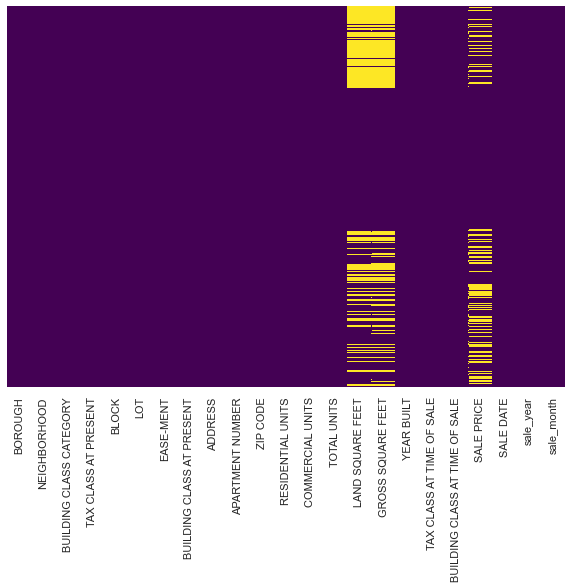

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#take a look at where we're missing information

In [ ]:
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)
#drop variables that are missing large chunks of data, using inplace=True to make the change to our df

In [18]:
df=df.dropna()
#drop all non applicable cells

In [19]:
sum(df.duplicated())
#take a look at how many duplicate values we have

348

In [20]:
df.drop_duplicates(inplace=True)
#drop dups, using inplace=True to make the change to our df

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47896 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         47896 non-null  category      
 1   NEIGHBORHOOD                    47896 non-null  category      
 2   BUILDING CLASS CATEGORY         47896 non-null  category      
 3   TAX CLASS AT PRESENT            47896 non-null  category      
 4   BLOCK                           47896 non-null  int64         
 5   LOT                             47896 non-null  int64         
 6   BUILDING CLASS AT PRESENT       47896 non-null  category      
 7   ADDRESS                         47896 non-null  object        
 8   ZIP CODE                        47896 non-null  category      
 9   RESIDENTIAL UNITS               47896 non-null  int64         
 10  COMMERCIAL UNITS                47896 non-null  int64         
 11  TO

In [23]:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)
#take a look at how many observations are outliers

0.24298480040086856

In [24]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()
#describe the 'sale price' variable

count    3.619700e+04
mean     8.796799e+05
std      1.032989e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.468710e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


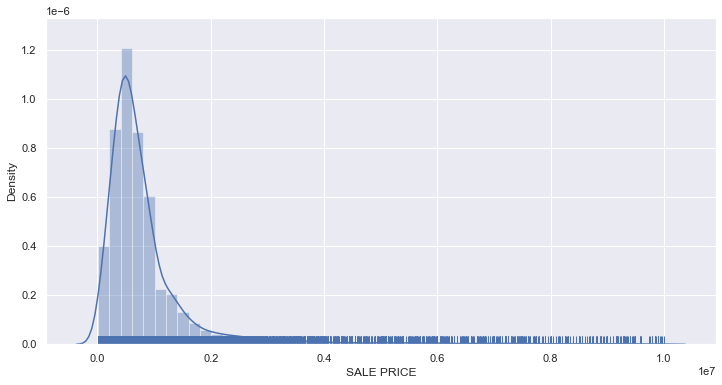

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()
#plot the 'sale price' observation density

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


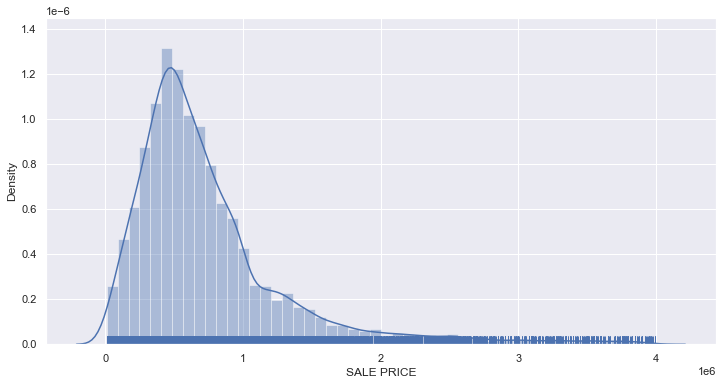

In [26]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()
#plot the 'sale price' observation density for when 'sale price' is less than 4mill

In [27]:
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()
#some rows have "0" until 'year built'. How many of them are there?

1702

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


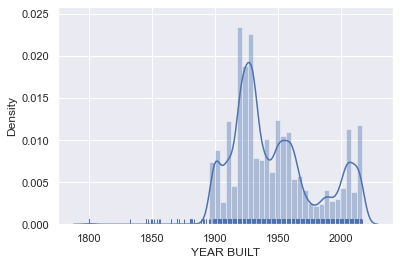

In [28]:
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()
#density plot for 'year built'

In [29]:
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()
#how many total units are in this df

3426

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


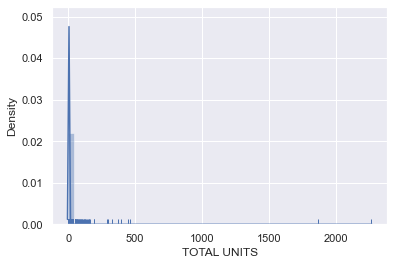

In [30]:
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()
#density plot to find if most plots have multiple or single units

In [31]:
df4.describe().T
#look at some statistical information for each column

,count,mean,std,min,25%,50%,75%,max
BLOCK,30236.0,5418.821835,3753.775464,1.0,2395.0,4836.0,7677.0,16319.0
LOT,30236.0,185.704987,384.518819,1.0,22.0,44.0,83.0,3597.0
RESIDENTIAL UNITS,30236.0,1.970532,12.586963,0.0,1.0,1.0,2.0,1844.0
COMMERCIAL UNITS,30236.0,0.173039,13.034598,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,30236.0,2.147804,18.198705,1.0,1.0,1.0,2.0,2261.0
LAND SQUARE FEET,30236.0,3133.582088,27966.319284,0.0,1816.5,2417.0,3500.0,4228300.0
GROSS SQUARE FEET,30236.0,2440.363276,23800.244758,0.0,1208.0,1680.0,2392.0,3750565.0
SALE PRICE,30236.0,793820.011146,594725.186839,10001.0,436000.0,630000.0,940000.0,3995000.0


In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30236 entries, 3 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BLOCK                           30236 non-null  int64         
 5   LOT                             30236 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30236 non-null  category      
 7   ADDRESS                         30236 non-null  object        
 8   ZIP CODE                        30236 non-null  category      
 9   RESIDENTIAL UNITS               30236 non-null  int64         
 10  COMMERCIAL UNITS                30236 non-null  int64         
 11  TO

In [34]:
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)
#drop variables that don't add anything to the analysis -- these all act as identification numbers for the units

In [35]:
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df4.head()
#order data by borough

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [37]:
df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar
#look at the mean 'sale price' in each borough in ascending order

,BOROUGH,SALE PRICE
0,Staten Island,5.257797e+05
1,Bronx,5.581147e+05
2,Queens,7.079732e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.846523e+06


In [157]:
df.to_csv("altered.nycpropertysales.csv")
#download altered df for future use